Using workflow column: Where do you primarily use AI in your development workflow? (Select all that apply)


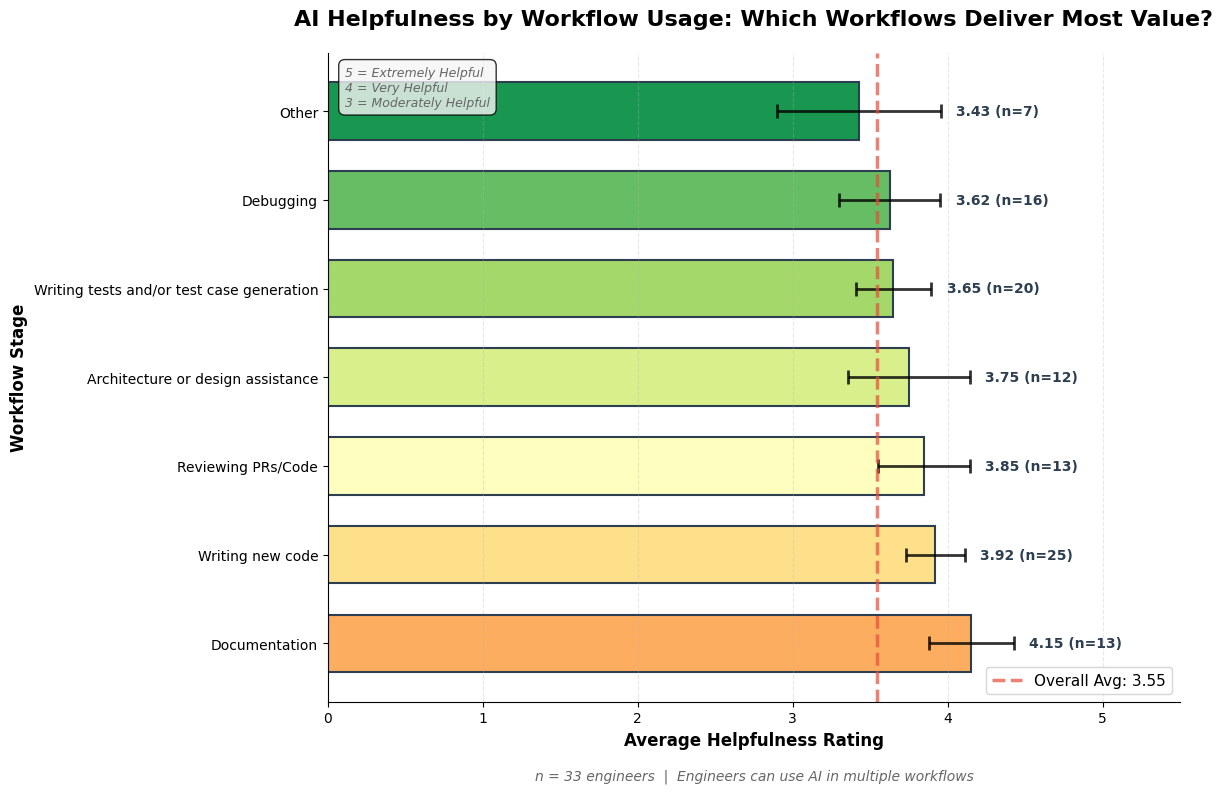


AI HELPFULNESS BY WORKFLOW ANALYSIS

📊 Overall Average Helpfulness: 3.55/5.0
   Total Engineers: 33

🔄 Workflow Sentiment Rankings (Highest to Lowest):
Rank   Workflow                                           Avg Rating   Users    vs Avg    
1      Documentation                                      4.15         13       +0.61     
2      Writing new code                                   3.92         25       +0.37     
3      Reviewing PRs/Code                                 3.85         13       +0.30     
4      Architecture or design assistance                  3.75         12       +0.20     
5      Writing tests and/or test case generation          3.65         20       +0.10     
6      Debugging                                          3.62         16       +0.08     
7      Other                                              3.43         7        -0.12     

✨ Key Insights:

   🏆 Workflows with Highest Satisfaction:
   1. Documentation: 4.15/5.0 (13 users)
   2. Writing new 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Load the data
df = pd.read_csv('../responses.csv')

# Filter out non-engineering teams
teams_to_exclude = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
df_filtered = df[~df['Which team are you a part of?'].isin(teams_to_exclude)].copy()

# Get column names
workflow_col = df_filtered.columns[14]  # Column O - Where they use AI in workflow
helpfulness_col = 'On a scale of 1 to 5, how would you rate the overall helpfulness of AI in your daily development tasks?'

print(f"Using workflow column: {workflow_col}")

# Create numeric mapping for helpfulness
rating_values = {
    'Extremely Helpful': 5,
    'Very Helpful': 4,
    'Moderately Helpful': 3,
    'Slightly Helpful': 2,
    'Not Helpful': 1
}

df_filtered['rating_numeric'] = df_filtered[helpfulness_col].map(rating_values)

# Parse workflow usage and collect helpfulness ratings per workflow
workflow_ratings = defaultdict(list)

for idx, row in df_filtered.iterrows():
    if pd.notna(row[workflow_col]) and pd.notna(row['rating_numeric']):
        workflows = [wf.strip() for wf in row[workflow_col].split(',')]
        rating = row['rating_numeric']
        
        for workflow in workflows:
            workflow_ratings[workflow].append(rating)

# Calculate statistics for each workflow
workflow_stats = []
for workflow, ratings in workflow_ratings.items():
    avg = np.mean(ratings)
    count = len(ratings)
    std_dev = np.std(ratings, ddof=1)  # Sample standard deviation
    sem = std_dev / np.sqrt(count)  # Standard error of the mean
    workflow_stats.append({
        'Workflow': workflow,
        'Avg_Rating': avg,
        'Count': count,
        'Std_Dev': std_dev,
        'SEM': sem
    })

# Convert to DataFrame and sort by average rating
workflow_sentiment_df = pd.DataFrame(workflow_stats)
workflow_sentiment_df = workflow_sentiment_df.sort_values('Avg_Rating', ascending=True)

# Calculate overall average
overall_avg = df_filtered['rating_numeric'].mean()

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Create color gradient based on rating (red-yellow-green)
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(workflow_sentiment_df)))

# Create horizontal bar chart with error bars (using standard error of the mean)
bars = ax.barh(workflow_sentiment_df['Workflow'], workflow_sentiment_df['Avg_Rating'], 
               xerr=workflow_sentiment_df['SEM'], 
               color=colors, height=0.65, edgecolor='#2C3E50', 
               linewidth=1.5, capsize=5, error_kw={'linewidth': 2, 'capthick': 2, 'alpha': 0.8})

# Add value labels with count (positioned after error bar)
for bar, avg, count, sem in zip(bars, workflow_sentiment_df['Avg_Rating'], 
                                 workflow_sentiment_df['Count'], workflow_sentiment_df['SEM']):
    # Position label after the bar + error bar
    label_x = avg + sem + 0.1
    ax.text(label_x, bar.get_y() + bar.get_height()/2, 
            f'{avg:.2f} (n={int(count)})', 
            va='center', fontsize=10, weight='bold', color='#2C3E50')

# Add overall average line
ax.axvline(overall_avg, color='#E74C3C', linestyle='--', linewidth=2.5, 
          alpha=0.7, label=f'Overall Avg: {overall_avg:.2f}')

# Customize plot
ax.set_xlabel('Average Helpfulness Rating', fontsize=12, weight='bold')
ax.set_ylabel('Workflow Stage', fontsize=12, weight='bold')
ax.set_title('AI Helpfulness by Workflow Usage: Which Workflows Deliver Most Value?', 
            fontsize=16, weight='bold', pad=20)
# Set xlim to accommodate error bars
max_with_error = (workflow_sentiment_df['Avg_Rating'] + workflow_sentiment_df['SEM']).max()
ax.set_xlim(0, max(5.5, max_with_error + 0.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=11, loc='lower right')
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Add rating scale reference
ax.text(0.02, 0.98, '5 = Extremely Helpful\n4 = Very Helpful\n3 = Moderately Helpful', 
        transform=ax.transAxes, ha='left', va='top',
        fontsize=9, style='italic', color='#666666',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#F5F5F5', alpha=0.8))

# Add subtitle
plt.text(0.5, -0.12, f'n = {len(df_filtered)} engineers  |  Engineers can use AI in multiple workflows', 
         ha='center', transform=ax.transAxes,
         fontsize=10, style='italic', color='#666666')

plt.tight_layout()
plt.show()

# Print detailed summary
print("\n" + "="*80)
print("AI HELPFULNESS BY WORKFLOW ANALYSIS")
print("="*80)

print(f"\n📊 Overall Average Helpfulness: {overall_avg:.2f}/5.0")
print(f"   Total Engineers: {len(df_filtered)}")

print(f"\n🔄 Workflow Sentiment Rankings (Highest to Lowest):")
print(f"{'Rank':<6} {'Workflow':<50} {'Avg Rating':<12} {'Users':<8} {'vs Avg':<10}")
print("="*80)

for i, (_, row) in enumerate(workflow_sentiment_df.sort_values('Avg_Rating', ascending=False).iterrows(), 1):
    workflow = row['Workflow']
    avg = row['Avg_Rating']
    count = int(row['Count'])
    diff = avg - overall_avg
    
    # Determine if above or below average
    comparison = f"+{diff:.2f}" if diff > 0 else f"{diff:.2f}"
    
    print(f"{i:<6} {workflow:<50} {avg:<12.2f} {count:<8} {comparison:<10}")

print(f"\n✨ Key Insights:")

# Top 3 workflows
top_3 = workflow_sentiment_df.nlargest(3, 'Avg_Rating')
print(f"\n   🏆 Workflows with Highest Satisfaction:")
for i, (_, row) in enumerate(top_3.iterrows(), 1):
    print(f"   {i}. {row['Workflow']}: {row['Avg_Rating']:.2f}/5.0 ({int(row['Count'])} users)")

# Bottom 3 workflows
bottom_3 = workflow_sentiment_df.nsmallest(3, 'Avg_Rating')
print(f"\n   ⚠️  Workflows with Lowest Satisfaction:")
for i, (_, row) in enumerate(bottom_3.iterrows(), 1):
    print(f"   {i}. {row['Workflow']}: {row['Avg_Rating']:.2f}/5.0 ({int(row['Count'])} users)")

# Workflows above/below average
above_avg = workflow_sentiment_df[workflow_sentiment_df['Avg_Rating'] > overall_avg]
below_avg = workflow_sentiment_df[workflow_sentiment_df['Avg_Rating'] < overall_avg]

print(f"\n   • {len(above_avg)} workflows rated above average")
print(f"   • {len(below_avg)} workflows rated below average")

# Most/least popular workflows
most_popular = workflow_sentiment_df.nlargest(1, 'Count').iloc[0]
print(f"\n   • Most common workflow: {most_popular['Workflow']} ({int(most_popular['Count'])} users, {most_popular['Avg_Rating']:.2f} rating)")

print(f"\n💡 Interpretation:")
print(f"   • Workflows with ratings above {overall_avg:.2f} indicate where AI delivers the most value")
print(f"   • Workflows below average may need better tooling, training, or use cases")
print(f"   • Engineers using AI in high-rated workflows tend to be more satisfied overall")

print("\n" + "="*80 + "\n")